# 0. Setup paths

In [1]:
import os

#CUSTOM_MODEL_NAME = 'my_ssd_mobnet'  # If further training of model is done
MODEL_DATE = '20200711'
MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
MODEL_TAR_FILENAME = MODEL_NAME + '.tar.gz'
MODELS_DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/'
MODEL_DOWNLOAD_LINK = MODELS_DOWNLOAD_BASE + MODEL_DATE + '/' + MODEL_TAR_FILENAME

# Workspace paths to setup directory
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'ADV_PATH': os.path.join('Tensorflow', 'workspace','images', 'adversarial-examples'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
}

# Model-specific paths
PATH_TO_MODEL_TAR = os.path.join(paths['MODEL_PATH'], MODEL_TAR_FILENAME)
PATH_TO_CKPT = os.path.join(paths['MODEL_PATH'], os.path.join(MODEL_NAME, 'checkpoint/'))
PATH_TO_CFG = os.path.join(paths['MODEL_PATH'], os.path.join(MODEL_NAME, 'pipeline.config'))


In [2]:
import urllib.request

# Download labels file
LABEL_FILENAME = 'mscoco_label_map.pbtxt'
LABELS_DOWNLOAD_BASE = \
    'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
PATH_TO_LABELS = os.path.join(paths['MODEL_PATH'], os.path.join(MODEL_NAME, LABEL_FILENAME))
if not os.path.exists(PATH_TO_LABELS):
    print('Downloading label file... ', end='')
    urllib.request.urlretrieve(LABELS_DOWNLOAD_BASE + LABEL_FILENAME, PATH_TO_LABELS)
    print('Done')

In [3]:
# Creates paths from path variable
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Dataset

In [ ]:
!pip install --upgrade pip setuptools wheel --user
!pip install fiftyone[desktop] --user
!pip install pycocotools

In [4]:
import fiftyone as fo
import fiftyone.zoo as foz

In [1]:
# Check that FiftyOne is correctly installed
dataset = foz.load_zoo_dataset(
    "quickstart",
    dataset_dir=paths["IMAGE_PATH"] + "quickstart"
)
session = fo.launch_app(dataset)
fo.launch_app(dataset, desktop=True)

NameError: name 'foz' is not defined

In [ ]:
# NB! This downloads entire dataset, approx 144Gb
dataset = fiftyone.zoo.load_zoo_dataset("coco-2017")

In [5]:
# fiftyone.zoo.list_zoo_datasets() # List available datasets from fiftyone
FO_DATASET_NAME = "coco-2017"
MAX_SAMPLES = 10
SPLITS = ["train", "validation", "test"]

In [ ]:
dataset = foz.load_zoo_dataset(
    FO_DATASET_NAME,
    splits=SPLITS,  
    label_types=["detections", "segmentations"],
    classes=["person", "car"],
    max_samples=MAX_SAMPLES,
    dataset_dir=paths["IMAGE_PATH"] + "/" + FO_DATASET_NAME,
    cleanup=True
)

In [ ]:
# Visualize the dataset in the FiftyOne App
session = fiftyone.launch_app(dataset, desktop=False)

# 2. Model

Download pretrained models

Tensorflow model zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

## Download Pretrained models

In [ ]:
if os.name=='nt':
    !pip install wget
    # Might need restart of computer for installation to register
    import wget      

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

## Install Tensorflow Object Detection

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

### Verification script to validate TFOD installation

In [ ]:
!pip install -r requirements.txt

In [ ]:
# Run this scripts until test says 'OK'.
# Might need to install several pip packages along the way
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [6]:
import object_detection  # Might need restarting kernel

### Download the pretrained model from Tensorflow model zoo

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

## Update config for transfer learning

In [7]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Limited tf.summary API due to missing TensorBoard installation.
Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

# 3. Prediction

## Load trained model

In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

## Run prediction on image

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [11]:
# Image to predict and display
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], FO_DATASET_NAME, 'validation/data')
IMAGE_NAME = os.listdir(IMAGE_PATH)[2]
IMAGE_PATH = IMAGE_PATH + "/" + IMAGE_NAME

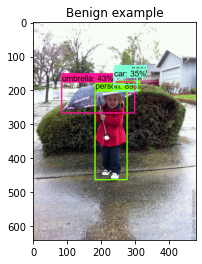

In [13]:
from utils.misc import load_image_into_numpy_array

image_np = load_image_into_numpy_array(IMAGE_PATH)

# Visualization params
MAX_BBOXES = 200
THRESHOLD = 0.3

# Alter image
# Flip horizontally
#image_np = np.fliplr(image_np).copy()
# Convert image to grayscale
#image_np = np.tile(np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=MAX_BBOXES,
            min_score_thresh=THRESHOLD,
            agnostic_mode=False)
plt.figure()
plt.title("Benign example")
plt.imshow(image_np_with_detections)
plt.show()

# 4. Generate adversarial example

## Sparse-Adversarial-Attack

In [5]:
#import Tianchi04 as SAA
!pip install -r Tianchi04/requirements.txt -y
!python Tianchi04/eval.py


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y
Traceback (most recent call last):
  File "Tianchi04/eval.py", line 11, in <module>
    from infer import infer
  File "C:\Users\marius\Documents\ntnu\specialization project\ae-attack-pipeline\Tianchi04\infer.py", line 8, in <module>
    from mmdet import __version__
  File "C:\ProgramData\Anaconda3\lib\site-packages\mmdet\__init__.py", line 2, in <module>
    import mmcv
ModuleNotFoundError: No module named 'mmcv'


# 5. Attack

In [ ]:
# Image to predict and display
ATTACK_EPS = 0.15  # Used to determine image in attack
ADV_NAME = IMAGE_NAME.split(".")[0] + "-" + str(ATTACK_EPS) + ".png"
ADV_PATH = os.path.join(paths['ADV_PATH'], ADV_NAME)

In [ ]:
from utils.misc import load_image_into_numpy_array

adv_np = load_image_into_numpy_array(ADV_PATH)

# Visualization params
MAX_BBOXES = 200
THRESHOLD = 0.3

input_tensor = tf.convert_to_tensor(np.expand_dims(adv_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
adv_np_with_detections = adv_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            adv_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=MAX_BBOXES,
            min_score_thresh=THRESHOLD,
            agnostic_mode=False)
plt.figure()
plt.imshow(adv_np_with_detections)
plt.title("Adversarial example with epsilon = {}".format(ATTACK_EPS))
plt.show()
plt.imshow(image_np_with_detections)
plt.title("Original image")
plt.show()